In [2]:
import os
from pathlib import Path
import numpy as np
import mne

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

# Import fooof for checking model fits
from fooof import FOOOF
from fooof import FOOOFGroup

# KNEE freqs
from fooof.utils.params import compute_knee_frequency

# Plotting functions
from spiketools.plts.utils import make_axes
import matplotlib.pyplot as plt
import seaborn

 # SET PSD calculation and FOOOF PARAMETERS

In [19]:
f_min = 1
f_max = 45
t     = 15
fs    = 200
SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :f_min , 'fmax':f_max, 'n_fft': fs*t, 'n_overlap': fs*t*0.5}

SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'fixed'}


# Set the vectors to store the results

In [16]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set result path
result_path = Path('/home/b1044271/Columbia/Results/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [20]:
W_Kn  = np.zeros([len(regions)-4,200])*np.nan
W_Exp = np.zeros([len(regions)-4,200])*np.nan
W_Exp2 = np.zeros([len(regions)-4,200])*np.nan

N2_Kn  = np.zeros([len(regions)-4,200])*np.nan
N2_Exp = np.zeros([len(regions)-4,200])*np.nan
N2_Exp2 = np.zeros([len(regions)-4,200])*np.nan

N3_Kn  = np.zeros([len(regions)-4,200])*np.nan
N3_Exp = np.zeros([len(regions)-4,200])*np.nan
N3_Exp2 = np.zeros([len(regions)-4,200])*np.nan

R_Kn  = np.zeros([len(regions)-4,200])*np.nan
R_Exp = np.zeros([len(regions)-4,200])*np.nan
R_Exp2 = np.zeros([len(regions)-4,200])*np.nan



# WAKEFULNESS

In [21]:
PSDs_W =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_W[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
    # parameters exctract
    W_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    W_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    W_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')


    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 53 power spectra.
Running FOOOFGroup across 53 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior insula_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 71 power spectra.
Running FOOOFGroup across 71 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iE

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 43 power spectra.
Running FOOOFGroup across 43 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior and middle occipital gyri_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 21 power spectra.
Running FOOOFGroup across 21 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior frontal gyrus and frontal pole_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 89 power spectra.
Running FOOOFGroup across 89 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior parietal lobule_W.edf...
EDF fi

# N2

In [22]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_N2 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N2[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
       
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N2_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N2_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    N2_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')


    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Calcarine 

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 149 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Middle temporal gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 115 power spectra.
Running FOOOFGroup across 115 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Opercular part of inferior frontal gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 30 power spectra.
Running FOOOFGroup across 30 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Orbital part of inferior frontal gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 17 power spectra.
Running FOOOFGroup across 17

# N3

In [23]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_N3 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N3[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N3_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N3_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    N3_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Calcarine 

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/core/funcs.py:67: RuntimeWarning: invalid value encountered in log10
  ys = ys + offset - np.log10(knee + xs**exp)


Running FOOOFGroup across 149 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Middle temporal gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 115 power spectra.
Running FOOOFGroup across 115 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Opercular part of inferior frontal gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 30 power spectra.
Running FOOOFGroup across 30 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Orbital part of inferior frontal gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 17 power spectra.
Running FOOOFGroup across 17

# REM 

In [24]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_R =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_R[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
     
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    # parameters exctract
    R_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    R_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    R_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 42 power spectra.
Running FOOOFGroup across 42 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 19 power spectra.
Running FOOOFGroup across 19 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 35 power spectra.
Running FOOOFGroup across 35 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Calcar

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 14 power spectra.
Running FOOOFGroup across 14 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior frontal gyrus and frontal pole_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 64 power spectra.
Running FOOOFGroup across 64 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior parietal lobule_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 36 power spectra.
Running FOOOFGroup across 36 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior temporal gyrus_R.edf...
EDF file detected
Setting channel info st

In [18]:
# SAVING

# Helper function for paths, check for the path and creates ones if not found
def check_path(path):
    if not os.path.exists(path):
        os.mkdir(path)

check_path(result_path)

np.save(Path(result_path /'iEEG_t15_F45_W.npy'),PSDs_W)
np.save(Path(result_path /'iEEG_t15_F45_W.npy'),PSDs_N2)
np.save(Path(result_path /'iEEG_t15_F45_W.npy'),PSDs_N3)
np.save(Path(result_path /'iEEG_t15_F45_W.npy'),PSDs_R)

# PLOTTING

In [ ]:
saved = 0
np.load()

/tmp/ipykernel_3644895/2426908012.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])
/tmp/ipykernel_3644895/2426908012.py:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])


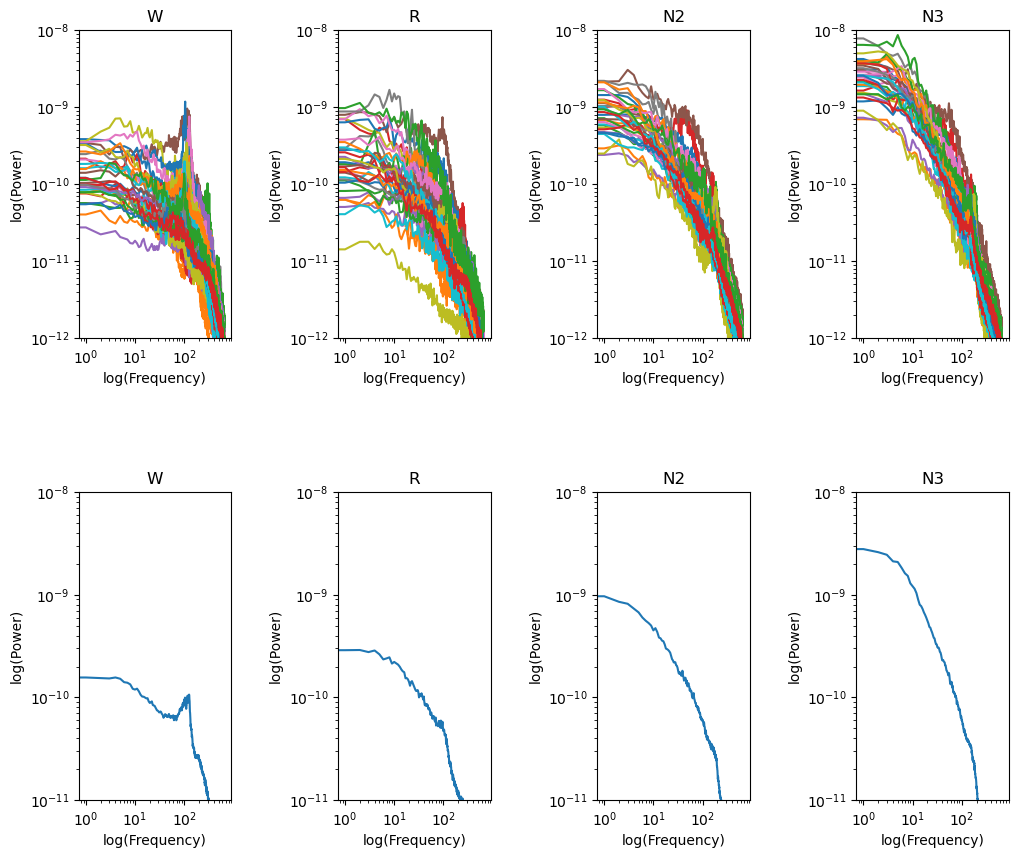

In [13]:
array_list = [PSDs_W, PSDs_R,PSDs_N2, PSDs_N3]

titles =  ['W','R','N2','N3']
# Plotting
#fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 6)) # create a subplot
fig = plt.figure(figsize=(12, 10))    
fig.subplots_adjust(hspace=0.5, wspace=0.7)

for i, V in enumerate(array_list):
    
    ax = fig.add_subplot(2, 4, i+1)

    ax.loglog(np.transpose(V))
    ax.set_xlabel('log(Frequency)')
    ax.set_ylabel('log(Power)')
    ax.title.set_text(titles[i])
    ax.set_ylim([10e-13 ,10e-9])
    ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])

    ax = fig.add_subplot(2, 4, i+5)
    ax.loglog(np.nanmean(V,0))
    ax.set_xlabel('log(Frequency)')
    ax.set_ylabel('log(Power)')   
    ax.title.set_text(titles[i])
    ax.set_ylim([10e-12 ,10e-9])
    ax.set_xlim([np.log(np.min(EEG_psd.freqs)), np.log(np.min(EEG_psd.freqs))])


In [18]:
np.nanmean(V,0)

array([3.16217327e-09, 2.81413025e-09, 2.53515130e-09, 2.30368268e-09,
       2.04686480e-09, 2.16359529e-09, 1.84042078e-09, 1.65120717e-09,
       1.57478949e-09, 1.31597535e-09, 1.22674763e-09, 1.22768176e-09,
       1.12958590e-09, 9.40751106e-10, 8.07878844e-10, 7.70644470e-10,
       7.81447664e-10, 7.21790880e-10, 6.86060232e-10, 6.44998215e-10,
       5.91326772e-10, 5.48650304e-10, 4.94249148e-10, 5.15112317e-10,
       4.95550680e-10, 4.72601250e-10, 4.48984219e-10, 4.21448236e-10,
       4.20595512e-10, 3.75071880e-10, 3.63582508e-10, 3.62216145e-10,
       3.43221984e-10, 3.50027208e-10, 3.55751412e-10, 3.45220404e-10,
       3.24687533e-10, 3.19916755e-10, 3.01878873e-10, 2.79005329e-10,
       2.59222863e-10, 2.65679313e-10, 2.74102795e-10, 2.66381082e-10,
       2.63034506e-10, 2.64679402e-10, 2.47752401e-10, 2.50450392e-10,
       2.34530932e-10, 2.19890754e-10, 2.18542646e-10, 2.16012411e-10,
       2.20548691e-10, 1.99252859e-10, 2.05016404e-10, 2.14442975e-10,
      

In [26]:
# Compute knee frequency
Kn_W = compute_knee_frequency(W_Kn, W_Exp)
Kn_N2 = compute_knee_frequency(N2_Kn, N2_Exp)
Kn_N3 = compute_knee_frequency(N3_Kn, N3_Exp)
Kn_R = compute_knee_frequency(R_Kn, R_Exp)

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/utils/params.py:24: RuntimeWarning: invalid value encountered in power
  return knee ** (1./exponent)


/tmp/ipykernel_3748238/4108732533.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(titles)
/tmp/ipykernel_3748238/4108732533.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(titles)
/tmp/ipykernel_3748238/4108732533.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(titles)


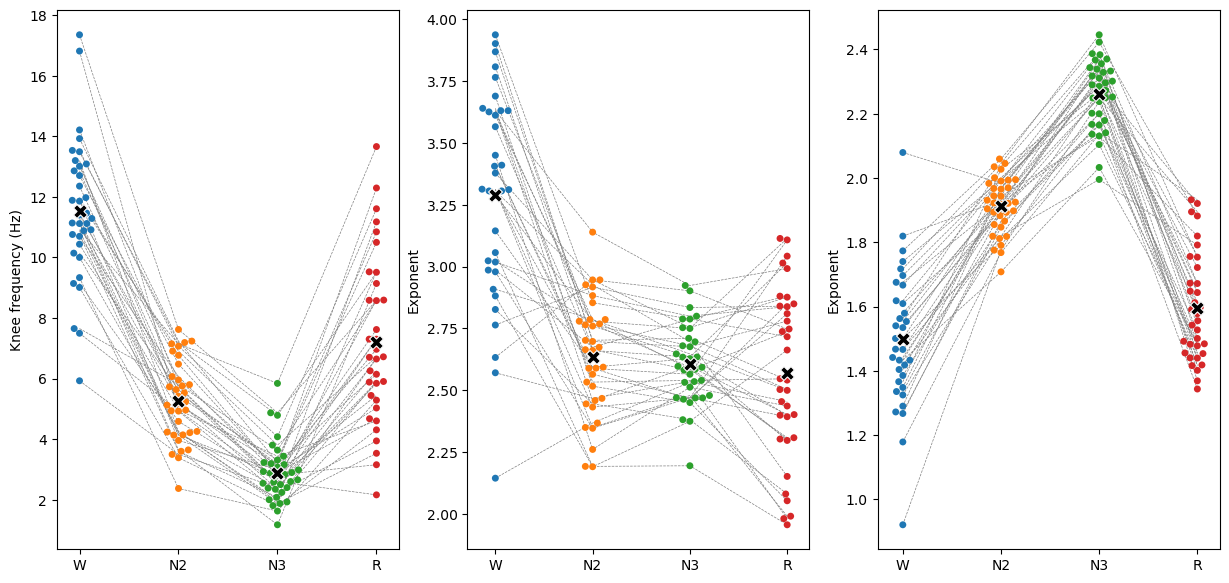

In [34]:
array_list2 = [np.nanmean(Kn_W,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1), np.nanmean(Kn_R,1)]
array_list3 = [np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1), np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1)]
array_list4 = [np.nanmean(W_Exp2,1), np.nanmean(N2_Exp2,1), np.nanmean(N3_Exp2,1), np.nanmean(R_Exp2,1)]

titles =  ['W','N2','N3','R']

fig = plt.figure(figsize=(15, 7))  

ax = fig.add_subplot(1, 3, 1)

# KNEE FREQUENCY
ax = seaborn.swarmplot(data=array_list2)
ax.set( ylabel='Knee frequency (Hz)')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list2,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list2[0], array_list2[1], array_list2[2], array_list2[3]], color = 'grey', linewidth = 0.5, linestyle = '--')

# EXPONENT - KNEE MODEL
ax = fig.add_subplot(1, 3, 2)
ax = seaborn.swarmplot(data=array_list3)
ax.set( ylabel='Exponent')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list3,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list3[0], array_list3[1], array_list3[2], array_list3[3]], color = 'grey', linewidth = 0.5, linestyle = '--')

# EXPONENT - NO KNEE MODEL
ax = fig.add_subplot(1, 3, 3)
ax = seaborn.swarmplot(data=array_list4)
ax.set( ylabel='Exponent')
ax.set_xticklabels(titles)
seaborn.scatterplot(x=[0,1,2,3], y=np.mean(array_list4,1), marker='X', color='black', s=100, zorder=4, legend=False)
plt.plot([array_list4[0], array_list4[1], array_list4[2], array_list4[3]], color = 'grey', linewidth = 0.5, linestyle = '--')


In [25]:
regions

array(['Amygdala_R.edf', 'Angular gyrus_R.edf',
       'Anterior cingulate_R.edf', 'Anterior insula_R.edf',
       'Calcarine cortex_R.edf', 'Central operculum_R.edf',
       'Cuneus_R.edf', 'Frontal operculum_R.edf',
       'Fusiform and parahippocampal gyri_R.edf',
       'Gyrus rectus and orbital gyri_R.edf', 'Hippocampus_R.edf',
       'Inferior ocipital gyrus and occipital pole_R.edf',
       'Inferior temporal gyrus_R.edf',
       'Lingual gyrus and occipital fusiform gyrus_R.edf',
       'Medial frontal cortex_R.edf',
       'Medial segment of precentral gyrus_R.edf',
       'Medial segment of superior frontal gyrus_R.edf',
       'Middle cingulate_R.edf', 'Middle frontal gyrus_R.edf',
       'Middle temporal gyrus_R.edf',
       'Opercular part of inferior frontal gyrus_R.edf',
       'Orbital part of inferior frontal gyrus_R.edf',
       'Parietal operculum_R.edf', 'Planum temporale_R.edf',
       'Postcentral gyrus (including medial segment)_R.edf',
       'Posterior cingulat